In [142]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import newaxis

<!-- Latest compiled and minified CSS -->
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">

<!-- Optional theme -->
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap-theme.min.css" integrity="sha384-rHyoN1iRsVXV4nD0JutlnGaslCJuC7uwjduW9SVrLvRYooPp2bWYgmgJQIXwl/Sp" crossorigin="anonymous">

<!-- Latest compiled and minified JavaScript -->
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js" integrity="sha384-Tc5IQib027qvyjSMfHjOMaLkfuWVxZxUPnCJA7l2mCWNIpG9mGCD8wGNIcPD7Txa" crossorigin="anonymous"></script>
<h2>1.1 Visualising the data </h2>

In [143]:
#load data and create usual vectors and matrices
itemsMatrix = np.loadtxt("ex2data1.txt", delimiter=',', unpack=True)
x = itemsMatrix[:-1].T
y = itemsMatrix[-1][np.newaxis].T

m = y.size # number of training examples

# insert ones vector to x
ones = np.ones((m,1))
x = np.hstack((ones,x))

X = x

n= x.shape[1] # number of features

theta = np.zeros((n,1))

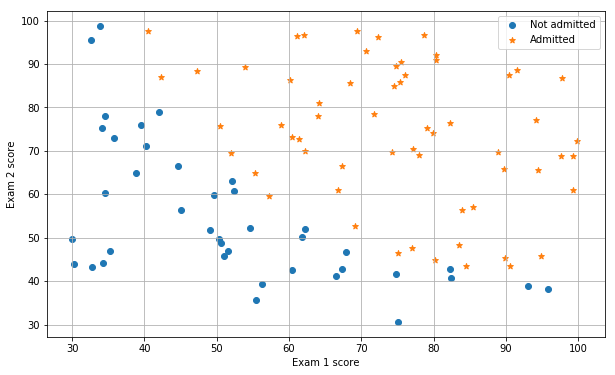

In [144]:
def plotData(axes):
    admittionResults = itemsMatrix[2]
    negativeIndices = admittionResults == 0
    positiveIndices = admittionResults == 1

    posx = itemsMatrix[:-1,positiveIndices] 
    negx = itemsMatrix[:-1, negativeIndices]

    axes.scatter(negx[0], negx[1], marker='o', label='Not admitted')
    axes.scatter(posx[0], posx[1], marker='*', label='Admitted')
    axes.set_xlabel('Exam 1 score')
    axes.set_ylabel('Exam 2 score')
    axes.grid(True)
    g = axes.legend() #g = garbage

fig, axes = plt.subplots(figsize = (10,6))
plotData(axes)

<h2>1.2 Implementation </h2>
<h4>1.2.1 Warmup exercise: sigmoid function</h4>

In [145]:
from scipy.special import expit

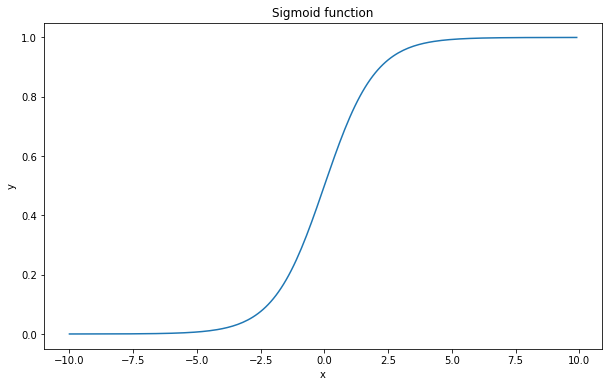

In [146]:
# I will use this function to calculate z = theta.dot(x)
#def oldHypothesis(featuresVector,theta):
#    return np.dot(theta,featuresVector)
#

def h(theta,x):
    return expit(x.dot(theta))


def sigmoid(z):
    return 1/(1+np.exp(-z))

fig, axes = plt.subplots(figsize = (10,6))

myx = np.arange(-10,10, .1)
axes.plot(myx, expit(myx))
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Sigmoid function')

<h4>1.2.2 Cost function and gradient </h4>

In [147]:
def cost(theta,x,y):
    firstPart = np.multiply(-y, np.log(h(theta,x)))
    secondPart = np.multiply((1-y), np.log(1-h(theta,x)))
    summationResult = np.sum(firstPart-secondPart)
    return (1/m)*summationResult


def gradient(theta,x,y):
    summationResult = 0
    gradients = np.empty((n,))
    for j in range(n):
        for i in range(m):
            summationResult += (h(theta,x[i,:])-y[i])*x[i,j]
        gradients[j] = (1/m)*summationResult 
        summationResult = 0
    return gradients
        
initial_theta = np.zeros((n,1))

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )


cost(theta,x,y) #calculate initial cost

0.69314718055994529

<h4> 1.2.3 Learning parameters using fmin from scipy </h4>

In [148]:
from scipy import optimize

theta = np.zeros(3)

import scipy.optimize as opt
result = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X, y))
result

theta = result[0]
print(theta)


[-25.16131863   0.20623159   0.20147149]


<h4> 1.2.4 Evaluating logistic regression </h4>

In [149]:
#For a student with an Exam 1 score
#of 45 and an Exam 2 score of 85, you should expect to see an admission
#probability of 0.776. 
testStudentX = np.array([[1,45,85]])
h(theta, testStudentX)

array([ 0.77629062])

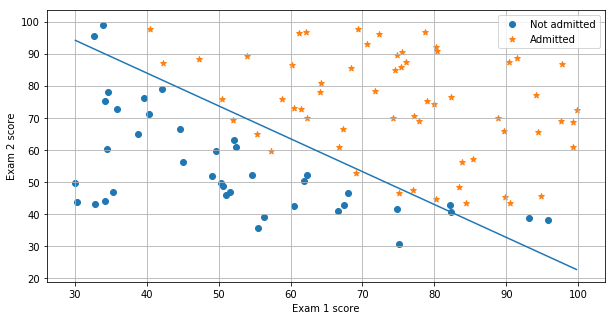

In [150]:
# find x1 and x2 values that makes x.dot(theta) = 0
# if h = theta0 + theta1*x1 + theta2*x2 = 0 then x2 = ?
x1 = x[:,1]
x2 = x[:,2]
x1range = np.arange(x1.min(), x1.max(), .1) 
x2range = -(theta[0]+theta[1]*x1range)/theta[2]


fig, axes = plt.subplots(figsize=(10,5))
axes.plot(x1range,x2range)

# visualizeData() function's code
admittionResults = itemsMatrix[2]
negativeIndices = admittionResults == 0
positiveIndices = admittionResults == 1

posx = itemsMatrix[:-1,positiveIndices] 
negx = itemsMatrix[:-1, negativeIndices]

axes.scatter(negx[0], negx[1], marker='o', label='Not admitted')
axes.scatter(posx[0], posx[1], marker='*', label='Admitted')
axes.set_xlabel('Exam 1 score')
axes.set_ylabel('Exam 2 score')
axes.grid(True)
g = axes.legend() #g = garbage


<h1> 2. Regularized logistic regression </h1>

<h2> 2.0 Load Data </h2>

In [151]:
itemsMatrix = np.loadtxt("ex2data2.txt", delimiter=',', unpack=True).T
x = itemsMatrix[:,:-1]
y = itemsMatrix[:,-1][newaxis].T

m = y.size # number of training examples

#add ones to x matrix
x = np.hstack((np.ones((m,1)),x))

n = x.shape[1] # number of features

theta = np.zeros((n,1))
theta

array([[ 0.],
       [ 0.],
       [ 0.]])

<h2> 2.1 Visualizing the data </h2>

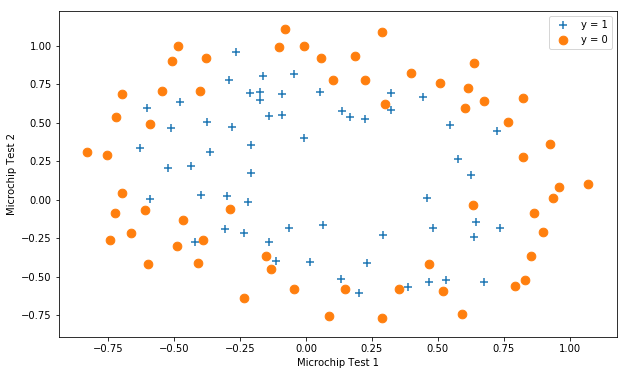

In [152]:
fig, axes = plt.subplots(figsize=(10,6))
axes.set_xlabel('Microchip Test 1')
axes.set_ylabel('Microchip Test 2')

posx = y.flatten() == 1
negx = y.flatten() == 0

axes.scatter(x[posx,1], x[posx,2], marker='+', label='y = 1', s=75)
axes.scatter(x[negx,1], x[negx,2], marker='o', label='y = 0', s=75)
axes.legend()

<h2> 2.2 Feature mapping </h2>

In [153]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out


#Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

<h2> 2.3 Cost function and gradient </h2>

In [154]:
def cost(theta,x,y, p_lambda = 0.):
    firstPart = np.multiply(-y, np.log(h(theta,x)))
    secondPart = np.multiply((1-y), np.log(1-h(theta,x)))
    summationResult = np.sum(firstPart-secondPart)
    return (1/m)*summationResult + (p_lambda/(2*m))*np.sum(theta**2)

def gradient(theta,x,y,p_lambda = 0.):
    summationResult = 0
    gradients = np.empty((n,))
    for j in range(n):
        for i in range(m):
            summationResult += (h(theta,x[i,:])-y[i])*x[i,j]
        gradients[j] = (1/m)*summationResult + (p_lambda/m)*theta[j]
        summationResult = 0
    return gradients
        
initial_theta = np.zeros((n,1))

    
cost(initial_theta,x,y,0)

0.6931471805599454

<h4> 2.3.1 Learning parameters using scipy.optimize.fmin_tnc </h4>

In [155]:
import scipy.optimize as opt


learningRate = 0
result = opt.fmin_tnc(func=cost, x0=initial_theta, fprime=gradient, args=(x, y, learningRate))
result


(array([-0.02036012, -0.04513828, -0.00018684]), 67, 4)

<h2> 2.4 Plotting the decision boundary </h2>

[-0.83007 -0.73007 -0.63007 -0.53007 -0.43007 -0.33007 -0.23007 -0.13007
 -0.03007  0.06993  0.16993  0.26993  0.36993  0.46993  0.56993  0.66993
  0.76993  0.86993  0.96993  1.06993]


/home/john/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


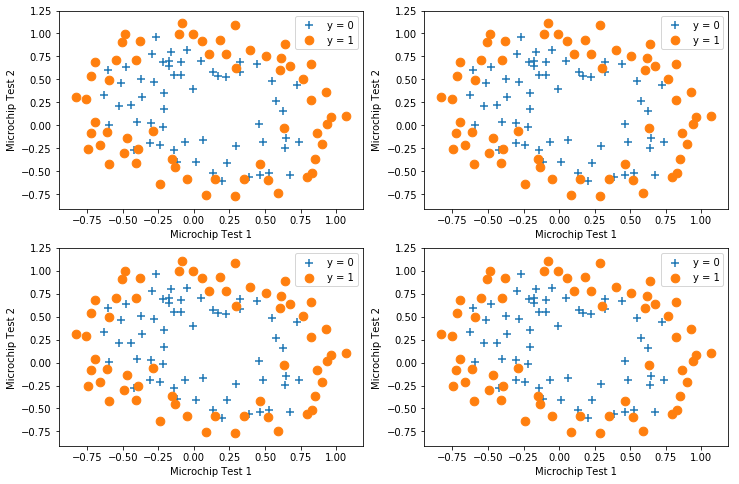

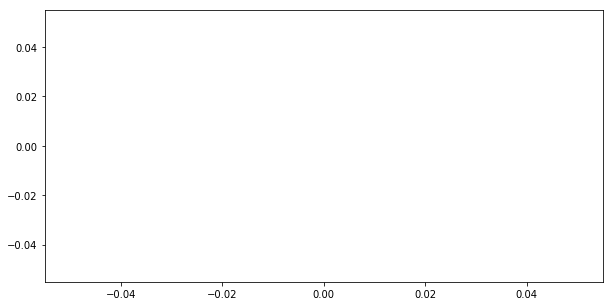

In [180]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 8))

def plotData(axes):
    axes.set_xlabel('Microchip Test 1')
    axes.set_ylabel('Microchip Test 2')

    posx = y.flatten() == 1
    negx = y.flatten() == 0

    axes.scatter(x[posx,1], x[posx,2], marker='+', s = 75, label= 'y = 0')
    axes.scatter(x[negx,1], x[negx,2], marker='o', s = 75, label= 'y = 1')
    axes.legend()
    

for i in range(2):
    for j in range(2):
        plotData(axes[i,j])
        
        

# find x1 and x2 values that makes x.dot(theta) = 0
# if h = theta0 + theta1*x1 + theta2*x2 = 0 then x2 = ?
x1 = x[:,1]
x2 = x[:,2]
x1range = np.arange(x1.min(), x1.max(), .1) 
x2range = -(theta[0]+theta[1]*x1range)/theta[2]
print(x1range)

fig, axes = plt.subplots(figsize=(10,5))
axes.plot(x1range,x2range)
